# Ch3 of TF book by BR and RBZ

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import tensorflow as tf
import numpy as np

c:\users\a00439512\appdata\local\continuum\anaconda3\envs\demo\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


-----------

3.2
    + placeholders, scopes, optimizers, and TensorBoard,
    

# Regression

## Toy Regression Dataset

In [ ]:
N = 10000

w_true = 5
b_true = 2

std_dev = 0.2

In [15]:
x_np = np.random.uniform(0,1,(N,1))
noise = np.random.normal(scale=std_dev, size=(N,1))

In [16]:
print(x_np.shape)
print(noise.shape)

(100, 1)
(100, 1)


In [17]:
y_np = np.reshape(w_true * x_np + b_true + noise , -1)

In [18]:
y_np.shape

(100,)

In [19]:
x_np.shape, y_np.shape

((100, 1), (100,))

Prologue:This is a three part series which will elaborate on Object Detection in images using Convolutional Neural Networks (CNN). First part will deal with groundbreaking papers in detection. Second part will give an overview on some of the fancier methodologies that have been published recently. Third part will be about one of our more sophisticated methods in performing detection in a domain like fashion where context around the regions play an important role. By the time I started writing this post, I came across two papers which deal with the context in a much different way than what we devised. So I will discuss those too.

An image classification problem is predicting the label of an image among the predefined labels. It assumes that there is single object of interest in the image and it covers a significant portion of image. Detection is about not only finding the class of object but also localizing the extent of an object in the image. The object can be lying anywhere in the image and can be of any size(scale) as can be seen in the figure 1.

$ x_y $

In [9]:
x = tf.placeholder(tf.float32, (N,1))
y = tf.placeholder(tf.float32, (N))

W = tf.Variable(tf.random_normal((1,1)))
b = tf.Variable(tf.zeros(1))

y_pred = tf.matmul(x,W) + b

loss = tf.reduce_sum((y-y_pred)**2)

op_train = tf.train.AdagradOptimizer(.005).minimize(loss)


In [11]:
epochs = 8

sess = tf.Session()
init_op = tf.global_variables_initializer()
sess.run(init_op)



for i in range(epochs):
    
    feed_dict = {x:x_np, y:y_np}
    
    _, l = sess.run([op_train, loss], feed_dict=feed_dict)
    print("step %d, loss: %f" % (i, l))


step 0, loss: 297595.250000
step 1, loss: 296784.062500
step 2, loss: 296211.062500
step 3, loss: 295744.437500
step 4, loss: 295340.437500
step 5, loss: 294979.687500
step 6, loss: 294650.562500
step 7, loss: 294345.968750


In [20]:
w_final, b_final = sess.run([W,b])

In [24]:
print(w_final)
print(w_final[0])

[[-1.213313]]
[-1.213313]


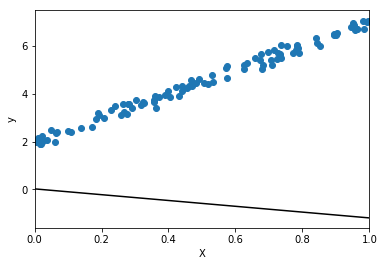

In [25]:
import matplotlib.pyplot as plt

plt.xlim(0,1)
plt.xlabel("X")
plt.ylabel("y")

plt.scatter(x_np, y_np)

x_left = 0.
y_left = w_final[0] * x_left + b_final

x_right = 1
y_right = w_final[0] * x_right + b_final

plt.plot([x_left, x_right], [y_left, y_right], color='k')

# Classification 

### Toy classification dataset

In [ ]:
N = 100



In [30]:
x_zeros = np.random.multivariate_normal(mean=np.array((-1, -1)), cov=.1*np.eye(2), size=(N//2,))

y_zeros = np.zeros((N//2,))

x_ones =  np.random.multivariate_normal(mean=np.array((1, 1)), cov=.1*np.eye(2), size=(N//2,))

y_ones = np.ones((N//2,))

In [32]:
print(x_zeros.shape)

print(y_zeros.shape)

print(x_ones.shape)

print(y_ones.shape)

(50, 2)
(50,)
(50, 2)
(50,)


In [40]:
x_np = np.vstack((x_zeros, x_ones))

print(x_np.shape)

y_np = np.concatenate([y_zeros, y_ones])

print(y_np.shape)

(100, 2)
(100,)


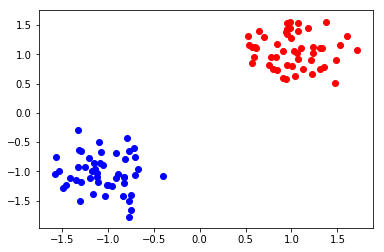

In [41]:
# Plot Zeros
plt.scatter(x_zeros[:, 0], x_zeros[:, 1], color="blue")
plt.scatter(x_ones[:, 0], x_ones[:, 1], color="red")

In [42]:
# tf 

x = tf.placeholder(tf.float32, (N,2))
y = tf.placeholder(tf.float32, (N,))

W = tf.Variable(tf.random_normal((2, 1)))
b = tf.Variable(tf.random_normal((1,)))

y_logit = tf.squeeze(tf.matmul(x,W)) + b

y_logit = tf.squeeze(tf.matmul(x, W) + b)
# the sigmoid gives the class probability of 1
y_one_prob = tf.sigmoid(y_logit)
# Rounding P(y=1) will give the correct prediction.
y_pred = tf.round(y_one_prob)


with tf.name_scope("loss"):
  # Compute the cross-entropy term for each datapoint
  entropy = tf.nn.sigmoid_cross_entropy_with_logits(logits=y_logit, labels=y)
  # Sum all contributions
  l = tf.reduce_sum(entropy)
with tf.name_scope("optim"):
  train_op = tf.train.AdamOptimizer(.01).minimize(l)

In [47]:
n_steps = 1000

sess = tf.Session()

sess.run(tf.global_variables_initializer())

# Train model
for i in range(n_steps):
    feed_dict = {x: x_np, y: y_np}
    _, loss = sess.run([train_op, l], feed_dict=feed_dict)
    print("loss: %f" % loss)

loss: 134.714233
loss: 133.148224
loss: 131.592285
loss: 130.046753
loss: 128.511932
loss: 126.988144
loss: 125.475670
loss: 123.974808
loss: 122.485802
loss: 121.008911
loss: 119.544395
loss: 118.092438
loss: 116.653229
loss: 115.226906
loss: 113.813629
loss: 112.413467
loss: 111.026505
loss: 109.652763
loss: 108.292252
loss: 106.945007
loss: 105.610954
loss: 104.290062
loss: 102.982292
loss: 101.687584
loss: 100.405914
loss: 99.137245
loss: 97.881546
loss: 96.638832
loss: 95.409134
loss: 94.192474
loss: 92.988914
loss: 91.798523
loss: 90.621391
loss: 89.457565
loss: 88.307167
loss: 87.170242
loss: 86.046890
loss: 84.937164
loss: 83.841095
loss: 82.758728
loss: 81.690063
loss: 80.635117
loss: 79.593857
loss: 78.566269
loss: 77.552261
loss: 76.551796
loss: 75.564804
loss: 74.591179
loss: 73.630852
loss: 72.683716
loss: 71.749680
loss: 70.828636
loss: 69.920494
loss: 69.025131
loss: 68.142471
loss: 67.272400
loss: 66.414825
loss: 65.569633
loss: 64.736725
loss: 63.915993
loss: 63.107323

loss: 2.747519
loss: 2.741481
loss: 2.735464
loss: 2.729468
loss: 2.723494
loss: 2.717540
loss: 2.711607
loss: 2.705696
loss: 2.699804
loss: 2.693934
loss: 2.688084
loss: 2.682254
loss: 2.676445
loss: 2.670656
loss: 2.664887
loss: 2.659138
loss: 2.653409
loss: 2.647701
loss: 2.642011
loss: 2.636342
loss: 2.630692
loss: 2.625061
loss: 2.619450
loss: 2.613857
loss: 2.608284
loss: 2.602731
loss: 2.597196
loss: 2.591680
loss: 2.586182
loss: 2.580703
loss: 2.575243
loss: 2.569802
loss: 2.564379
loss: 2.558975
loss: 2.553588
loss: 2.548220
loss: 2.542871
loss: 2.537539
loss: 2.532225
loss: 2.526928
loss: 2.521650
loss: 2.516389
loss: 2.511146
loss: 2.505920
loss: 2.500712
loss: 2.495521
loss: 2.490348
loss: 2.485191
loss: 2.480052
loss: 2.474930
loss: 2.469825
loss: 2.464736
loss: 2.459664
loss: 2.454609
loss: 2.449571
loss: 2.444550
loss: 2.439544
loss: 2.434555
loss: 2.429583
loss: 2.424626
loss: 2.419686
loss: 2.414762
loss: 2.409854
loss: 2.404963
loss: 2.400086
loss: 2.395226
loss: 2.39

In [48]:
# Get weights
w_final, b_final = sess.run([W, b])

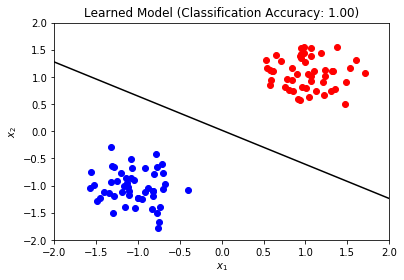

In [50]:
from scipy.special import logit

plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.title("Learned Model (Classification Accuracy: 1.00)")
plt.xlim(-2, 2)
plt.ylim(-2, 2)

# Plot Zeros
plt.scatter(x_zeros[:, 0], x_zeros[:, 1], color="blue")
plt.scatter(x_ones[:, 0], x_ones[:, 1], color="red")

x_left = -2
y_left = (1./w_final[1]) * (-b_final + logit(.5) - w_final[0]*x_left)

x_right = 2
y_right = (1./w_final[1]) * (-b_final + logit(.5) - w_final[0]*x_right)
plt.plot([x_left, x_right], [y_left, y_right], color='k')